# search map

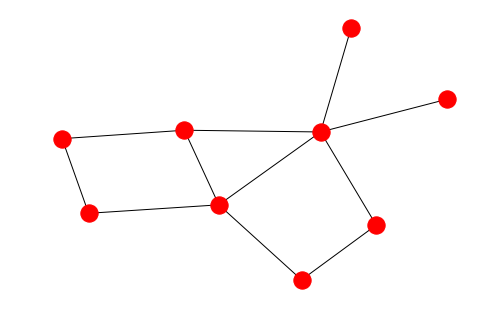

In [1]:
import networkx as nx
%matplotlib inline

# 输入所有的路径
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

# 存储字典
connection = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

# 画出图像
graph = connection
g = nx.Graph(graph)
nx.draw(g)

In [45]:
# 广度方式找到路径
def findPath_bfs(start, end, graph_connection):
    paths = [[start],]
    seen = set()
    # 使用了栈作为检索
    while(len(paths)!=0):
        path = paths.pop(0)
        cur_pos = path[-1]
        if cur_pos in seen: continue
        neighbors = graph_connection[cur_pos]
        #print("now: {}, next: {}".format(path, neighbors))
        for candidate in neighbors:
            if candidate == end:
                path.append(candidate)
                return path
            else:
                paths.append(path + [candidate])
        paths = sorted(paths, key=len)
        #print(paths)
        seen.add(cur_pos)
        

In [58]:
# 深度优先找到路径
def findPath_dfs(start, end, graph_connection):
    paths = [[start],]
    seen = set()
    while(len(paths)!=0):
        path = paths.pop()
        cur_pos = path[-1]
        #print(cur_pos)
        if cur_pos in seen: continue
        neighbors = graph_connection[cur_pos]
        #print("now: {}, next: {}".format(path, neighbors))
        for candidate in neighbors:
            if candidate == end:
                path.append(candidate)
                return path
            else:
                paths.append(path + [candidate])
        paths = sorted(paths, key=len, reverse=True)
        #print(paths)
        seen.add(cur_pos)

In [59]:
# 可视化路径
def draw_route(router):
    print("✈️->".join(router))
draw_route(findPath_bfs(MULUMUQI, BANGKOK, graph))

MULUMUQI✈️->BEIJING✈️->SHENZHEN✈️->BANGKOK


In [60]:
draw_route(findPath_dfs(MULUMUQI, BANGKOK, graph))

MULUMUQI✈️->BEIJING✈️->SHENZHEN✈️->BANGKOK


# generate sentence

In [61]:
# 定义规则
import random

decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

grammar1 = """
stmt = if block else block
block = cmp; assigment
assgiment = XXX
XXX
"""

grammar2 = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [67]:
# 解析语法结构，存储成字典形式
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [68]:
g = parse_grammar(grammar2)

In [71]:
g

{'Adj': [['蓝色的'], ['好看的'], ['小小的']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'sentence': [['noun_phrase', 'verb_phrase']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'verb_phrase': [['verb', 'noun_phrase']]}

In [69]:
# 递归实现自动化生成文本
def gene(grammar_parsed, target='sentence'):
    # 如果出现的target并不在语法结构中（字典的keys），那么就是纯文本，直接输出即可
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [70]:
gene(g)

'一个好看的篮球坐在一个桌子'

In [66]:
# 数学
for i in range(20):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))

9*4/9/1
4-4+8-0
4/1/2+5
727/2-9+1
1+0+05+9
5*0-0/6
1-7+9-5
8*7-5*7
8-6*1-4
2*5+8-8
3-5+6+3
6/4/7*2
3/4-6/9
8+1/3/5
4/9+22-8
4+9+3/5
7+2/5+5
7/5+2/8
9-97*9+4
5*4*3/5
